# **Predicting Scholarship Awards for Students using Academic Factors**

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

### Importing the requied dataset

In [2]:
df = pd.read_csv("/content/student_performance.csv")


In [3]:
df

,id,first_name,last_name,email,gender,sub 1,sub 2,sub 3,finacial need,Total,percentage,Grade,athlete,EXAM %
0,1,Rozelle,Caswell,rcaswell0@ucla.edu,F,29,37,4,YES,70,23.33,F,0,92.03
1,2,Trace,Spink,tspink1@etsy.com,M,59,16,88,YES,163,54.33,F,1,93.56
2,3,Hilton,O'Corhane,hocorhane2@ehow.com,M,52,19,25,YES,96,32.00,F,1,91.08
3,4,Mariellen,Welman,mwelman3@surveymonkey.com,F,3,17,37,YES,57,19.00,F,1,84.61
4,5,Gussie,Knevett,gknevett4@unesco.org,F,52,42,97,NO,191,63.67,D,1,79.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Parsifal,Northcott,pnorthcottrn@scientificamerican.com,M,37,59,88,NO,184,61.33,D,0,84.42
1996,1997,Celia,Douthwaite,cdouthwaitero@etsy.com,F,65,100,65,YES,230,76.67,C,1,75.66
1997,1998,Rudyard,O'Fallone,rofallonerp@abc.net.au,M,41,62,3,YES,106,35.33,F,0,70.06
1998,1999,Callean,Pulster,cpulsterrq@sitemeter.com,M,11,66,94,NO,171,57.00,F,0,85.62


### Exploratory Data Analysis

In [4]:
print(df.describe())

                id        sub 1        sub 2        sub 3       Total  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.00000   
mean   1000.500000    50.841500    49.750000    50.867000   151.45850   
std     577.494589    28.720564    29.377321    28.589211    49.38536   
min       1.000000     1.000000     1.000000     1.000000    12.00000   
25%     500.750000    27.000000    24.000000    26.000000   118.00000   
50%    1000.500000    50.000000    49.000000    51.000000   151.00000   
75%    1500.250000    75.000000    75.000000    75.000000   186.00000   
max    2000.000000   100.000000   100.000000   100.000000   295.00000   

        percentage     athlete        EXAM %  
count  2000.000000  2000.000000  2000.000000  
mean     50.486135     0.516000    79.893605  
std      16.461789     0.499869    11.579158  
min       4.000000     0.000000    60.000000  
25%      39.330000     0.000000    69.640000  
50%      50.330000     1.000000    80.240000  
75%      62.0

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   first_name     2000 non-null   object 
 2   last_name      2000 non-null   object 
 3   email          2000 non-null   object 
 4   gender         2000 non-null   object 
 5   sub 1          2000 non-null   int64  
 6   sub 2          2000 non-null   int64  
 7   sub 3          2000 non-null   int64  
 8   finacial need  2000 non-null   object 
 9   Total          2000 non-null   int64  
 10  percentage     2000 non-null   float64
 11  Grade          2000 non-null   object 
 12  athlete        2000 non-null   int64  
 13  EXAM %         2000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 218.9+ KB
None


Renaming the Columns

In [6]:
#renaming the columns with no spaces
df.rename(columns={'finacial need': 'finacial_need','sub 1':'sub_1','sub 2':'sub_2','sub 3':'sub_3','EXAM %':'EXAM_%'}, inplace=True)

In [7]:
print(df.columns)

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'sub_1', 'sub_2',
       'sub_3', 'finacial_need', 'Total', 'percentage', 'Grade', 'athlete ',
       'EXAM_%'],
      dtype='object')


### Label Encoder

using the label encoder function to change the categorical values into integers.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables for 'gender' and 'financial_need' columns
for column in df.select_dtypes(include=['object']).columns:
    if column == 'gender' or column == 'finacial_need':
        df[column] = label_encoder.fit_transform(df[column])

print(df)

        id first_name    last_name                                email  \
0        1    Rozelle      Caswell                   rcaswell0@ucla.edu   
1        2      Trace        Spink                     tspink1@etsy.com   
2        3     Hilton    O'Corhane                  hocorhane2@ehow.com   
3        4  Mariellen       Welman            mwelman3@surveymonkey.com   
4        5     Gussie      Knevett                 gknevett4@unesco.org   
...    ...        ...          ...                                  ...   
1995  1996   Parsifal    Northcott  pnorthcottrn@scientificamerican.com   
1996  1997      Celia   Douthwaite               cdouthwaitero@etsy.com   
1997  1998    Rudyard    O'Fallone               rofallonerp@abc.net.au   
1998  1999    Callean      Pulster             cpulsterrq@sitemeter.com   
1999  2000   Michelle  Stallebrass           mstallebrassrr@mozilla.org   

      gender  sub_1  sub_2  sub_3  finacial_need  Total  percentage Grade  \
0          0     29   

## Visualizations

 Generating a histogram illustrating the distribution of percentage values from the DataFrame df using Matplotlib and Seaborn.

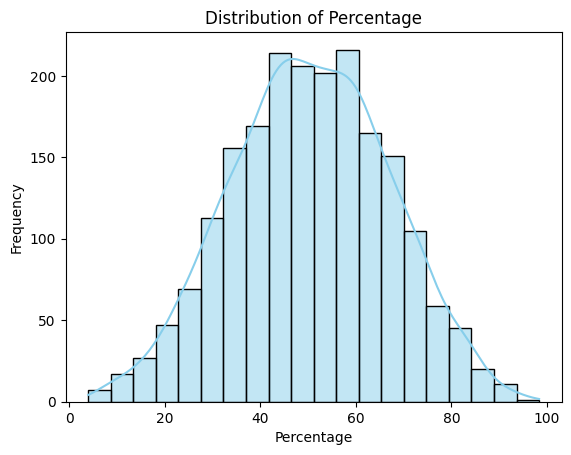

In [9]:
sns.histplot(df['percentage'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Percentage')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

Creating a pairplot to visualize pairwise relationships between variables 'sub_1', 'sub_2', and 'sub_3' from the DataFrame.

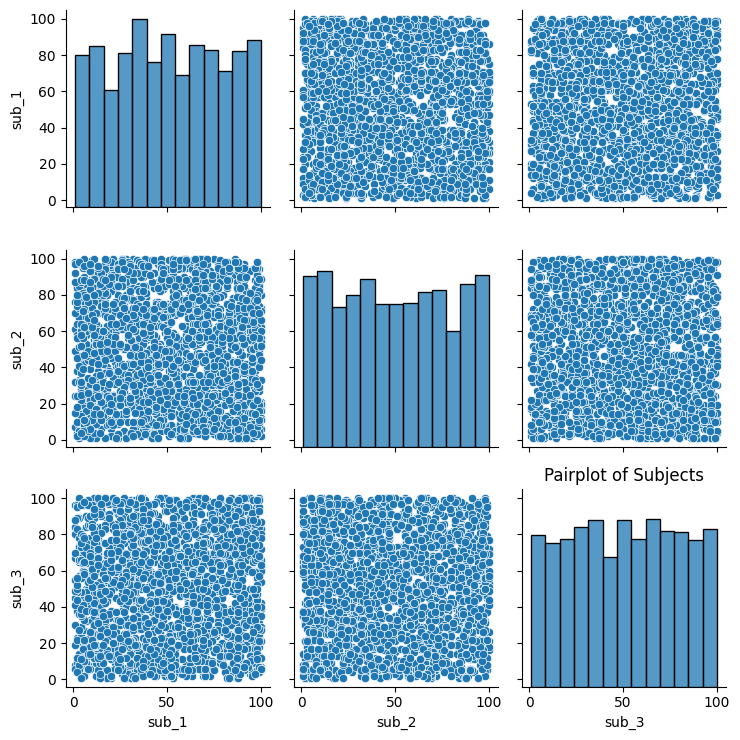

In [10]:
sns.pairplot(df[['sub_1', 'sub_2', 'sub_3']])
plt.title('Pairplot of Subjects')

# Adjust the layout explicitly
plt.tight_layout()

# Show the plot
plt.show()
import warnings
warnings.filterwarnings("ignore")



Creating a boxplot to compare the distribution of percentage values betwwen who students require  financial need not not.

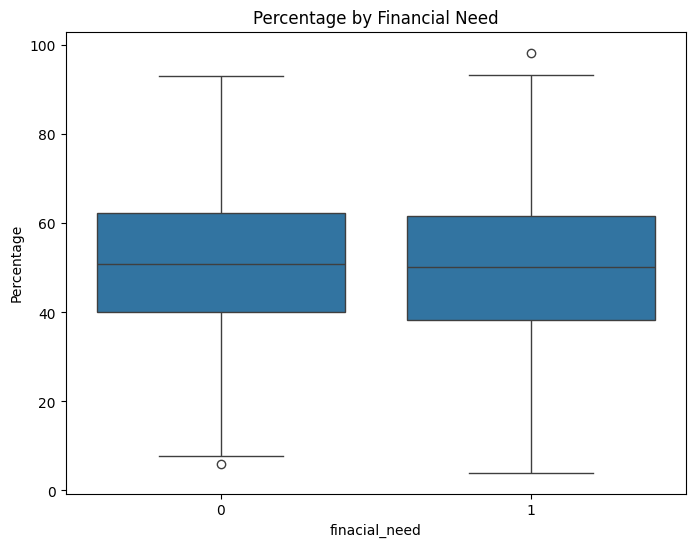

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='finacial_need', y='percentage', data=df)
plt.title('Percentage by Financial Need')
plt.xlabel('finacial_need')
plt.ylabel('Percentage')
plt.show()


Gender Distribution Across Grade Levels

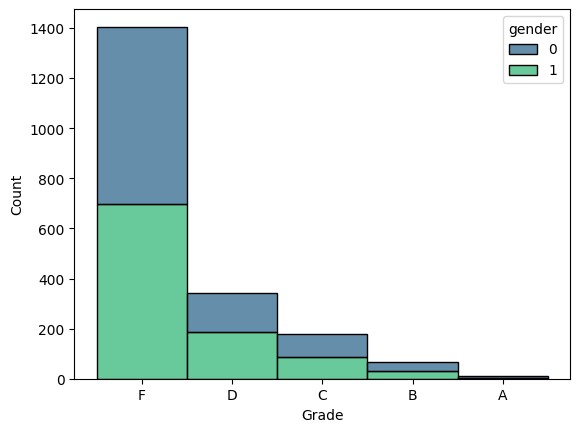

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=df, x="Grade", hue="gender", multiple="stack", palette="viridis")
plt.title("")
plt.show()

Distribution of Students by Financial Need Across Grade Levels

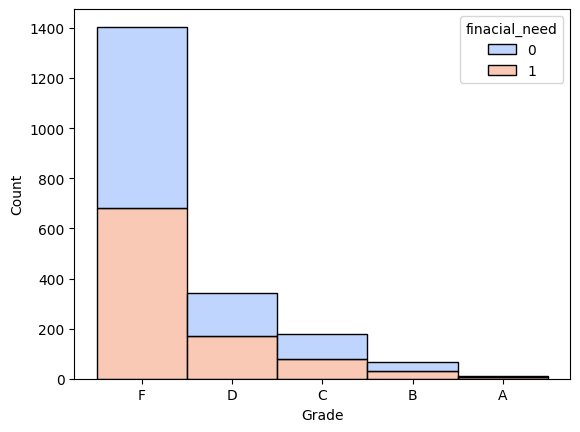

In [13]:
sns.histplot(data=df, x="Grade", hue="finacial_need", multiple="stack", palette="coolwarm")
plt.title("")
plt.show()

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables for 'gender' and 'financial_need' columns
for column in df.select_dtypes(include=['object']).columns:
    if column == 'Grade':
      df[column] = label_encoder.fit_transform(df[column])

## Predective modelling

Assigning the Freature and target varables

In [15]:
features = df.drop(['id', 'first_name','last_name','email','finacial_need'], axis=1)
target =df['finacial_need']

Spliiting the dataframe into test and train data

In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2, random_state=42)

Using the standardscaler to stadardize the train data.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

Training a logistic regression model, and predicting  the test set, calculating accuracy, generating a confusion matrix.

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       216
           1       0.51      0.43      0.47       184

    accuracy                           0.55       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.55      0.55      0.55       400



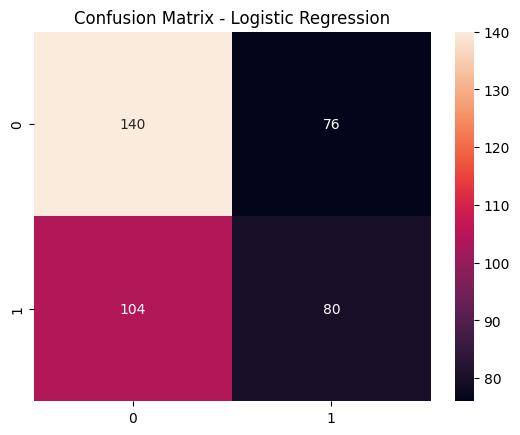

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Accuracy, Confusion Matrix, Classification Report
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

calculating the probabilities using the trained logistic regression model, and thresholds for the ROC curve, calculating the area under the ROC curve (AUC), and ploting the ROC curve with the AUC value.







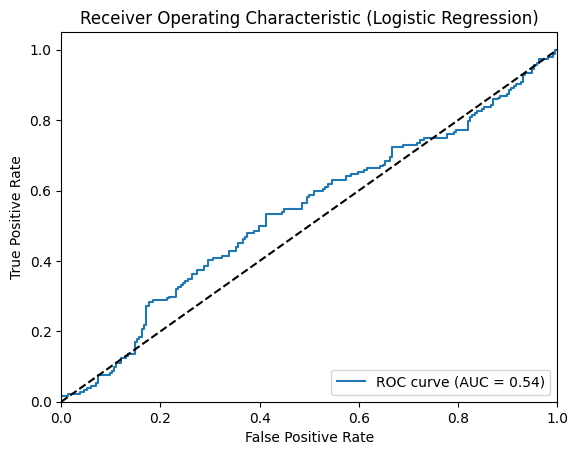

In [19]:
lr_probabilities = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probabilities)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## KNeighborsClassifier Model

Training a KNeighborsClassifier model, and predicting the test set, calculating accuracy, generating a confusion matrix.

Accuracy: 0.4875
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       216
           1       0.45      0.47      0.46       184

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



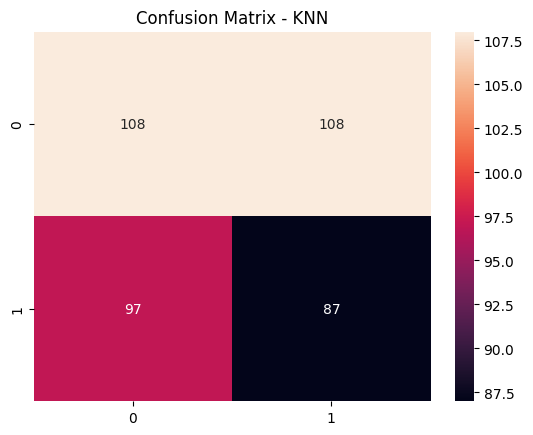

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Accuracy, Confusion Matrix, Classification Report
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix - KNN')
plt.show()

calculating the probabilities using the trained KNeighborsClassifier, and thresholds for the ROC curve, calculating the area under the ROC curve (AUC), and ploting the ROC curve with the AUC value.


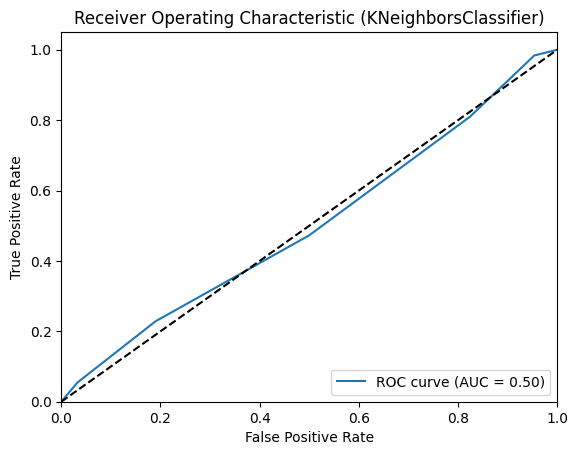

In [21]:
KNN_probabilities = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, KNN_probabilities)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.plot(fpr_KNN, tpr_KNN, label='ROC curve (AUC = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNeighborsClassifier)')
plt.legend(loc="lower right")
plt.show()

### RandomForestClassifier

Training a RandomForestClassifier model, and predicting the test set, calculating accuracy, generating a confusion matrix.

Accuracy: 0.5025
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       216
           1       0.46      0.46      0.46       184

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



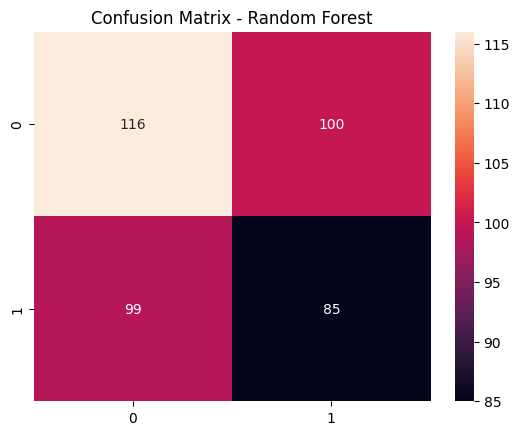

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy, Confusion Matrix, Classification Report
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix - Random Forest')
plt.show()


calculating the probabilities using the trained RandomForestClassifier, and thresholds for the ROC curve, calculating the area under the ROC curve (AUC), and ploting the ROC curve with the AUC value.

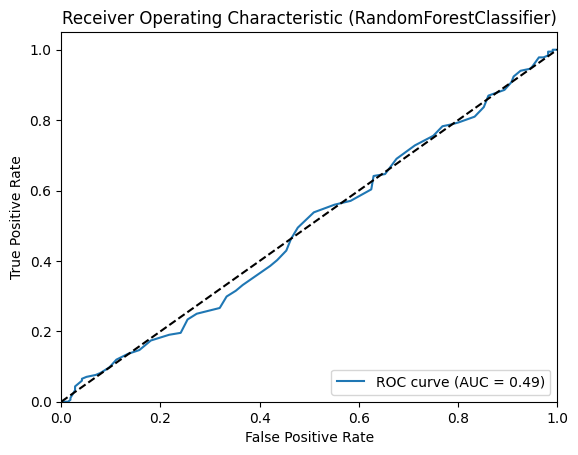

In [23]:
rf_probabilities = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RandomForestClassifier)')
plt.legend(loc="lower right")
plt.show()

## Example prediction

Creating a new DataFrame new_student_data containing information about a new student, including their grade, scores in subjects, total score, percentage, gender, exam percentage, and whether they are an athlete. Then, it uses the trained logistic regression model (lr_model) to predict whether the student needs financial aid based on the provided data. Finally, it prints the prediction result.

In [24]:
new_student_data = pd.DataFrame({
    "grade": ["4"],
    "sub_1":["49"],
    "sub_2":["51"],
    "sub_3": ["63"],
    "Total": ["163"],
    "percentage": ["54"],
    "gender": ["1"],
    "exam_percentage": [75],
    "athlete": ["0"]
})

# Making prediction
prediction = lr_model.predict(new_student_data)
print("Prediction:", prediction)

Prediction: [0]


Printing the Prediction.

In [25]:
print("\nExample Prediction:")
print("New Student Data:")
print(new_student_data)
prediction_label = "Needs Financial Aid" if prediction[0] == 1 else "Does Not get a Financial Aid"
print("Prediction:", prediction_label)


Example Prediction:
New Student Data:
  grade sub_1 sub_2 sub_3 Total percentage gender  exam_percentage athlete
0     4    49    51    63   163         54      1               75       0
Prediction: Does Not get a Financial Aid
